In [1]:
import random
from math import log2

import matplotlib.pyplot as plt

def signed(v):
    return v if random.random()<0.5 else -v

def create_clauses(i, seed=1):
    random.seed(seed)
    return [(signed(random.randint(0, i-1)), 
             signed(random.randint(0, i-1))) 
            for j in range(i)]

def create_random_solution(i, *kwargs):
    return {j:signed(1)==1 for j in range(i)}

def check_solution(solution, clauses):
    violations = list()
    for k,(a,b) in enumerate(clauses):
        if not (((solution[abs(a)]) == (a>0)) | 
                ((solution[abs(b)]) == (b>0))):
            violations.append(k)
    return violations


In [2]:
def sat2(clauses, n, start=create_random_solution):
    not_solved = True
    for external_loop in range(round(log2(n))):
        solution = start(n, clauses)
        history = list()
        for internal_loop in range(2*n**2):
            response = check_solution(solution, clauses)
            unsatisfied = len(response)
            history.append(unsatisfied)
            if unsatisfied==0:
                print ("Solution in %i external loops," % 
                       (external_loop+1), end=" ")
                print ("%i internal loops" % 
                       (internal_loop+1))
                not_solved = False
                break
            else:
                r1 = random.choice(response)
                r2 = random.randint(0, 1)
                clause_to_fix = clauses[r1][r2]
                solution[abs(clause_to_fix)] = (
                 clause_to_fix>0)
        else:
            continue
        break
    if not_solved is True:
        print("Not solvable")
    return history, solution


In [3]:
n = 1000
clauses = create_clauses(n, seed=0)
history, solution = sat2(clauses, n, 
        start=create_random_solution)

Solution in 1 external loops, 674 internal loops


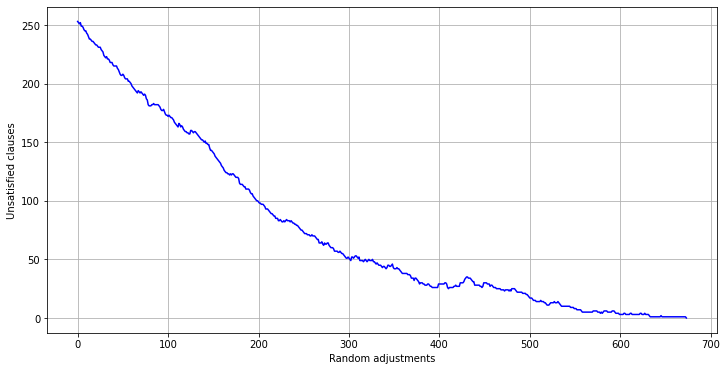

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history, 'b-')
plt.xlabel("Random adjustments")
plt.ylabel("Unsatisfied clauses")
plt.grid(True)
plt.show()

In [5]:
def better_start(n, clauses):
    clause_dict = dict()
    for pair in clauses:
        for clause in pair:
            if abs(clause) in clause_dict:
                clause_dict[abs(clause)].add(clause)
            else:
                clause_dict[abs(clause)] = {clause}

    solution = create_random_solution(n)

    for clause, value in clause_dict.items():
        if len(value)==1:
            solution[clause] = value.pop() > 0
    return solution

In [6]:
n = 1000
clauses = create_clauses(n, seed=0)
history, solution = sat2(clauses, n, 
        start=better_start)

Solution in 1 external loops, 400 internal loops


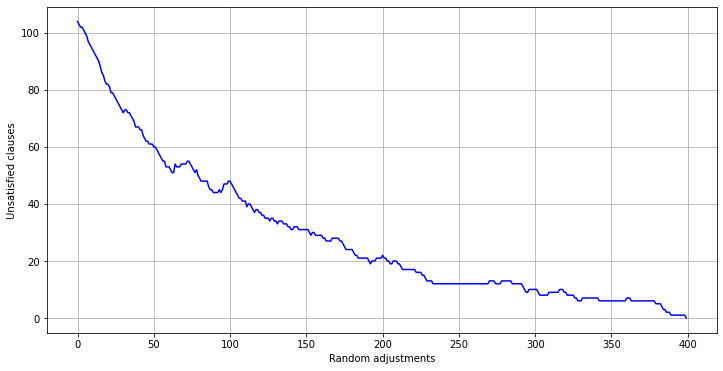

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(history, 'b-')
plt.xlabel("Random adjustments")
plt.ylabel("Unsatisfied clauses")
plt.grid(True)
plt.show()